In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/iris.csv")

In [3]:
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


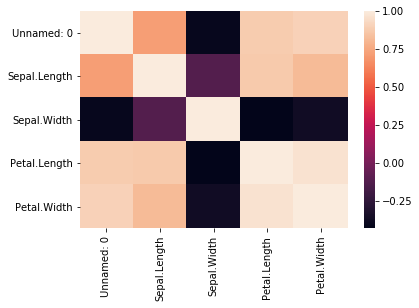

In [5]:
import seaborn as sb
sb.heatmap(df.corr())

In [6]:
df.corr()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Unnamed: 0,1.000000,0.716676,-0.402301,0.882637,0.900027
Sepal.Length,0.716676,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.402301,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.882637,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.900027,0.817941,-0.366126,0.962865,1.000000


In [9]:
m = 0.00001
q = []
for i in range(0, 100, 1):
    q.append(m)
    m = m + 0.00001

In [11]:
X = df[["Petal.Width", "Sepal.Length"]]
y = df[["Petal.Length"]]

In [14]:
from sklearn.linear_model import Ridge, Lasso
rd = Ridge()
from sklearn.model_selection import GridSearchCV
tp = {"alpha": q}
cv = GridSearchCV(rd, tp, scoring="neg_mean_absolute_error", cv=4)
cvmodel = cv.fit(X, y)

In [15]:
cvmodel.best_params_

{'alpha': 1e-05}

In [16]:
rr = Ridge(alpha=1e-05)

# LASSO

In [18]:
ls = Lasso()
cv_ls = GridSearchCV(ls, tp, scoring="neg_mean_absolute_error", cv=4)
cvmodel_ls = cv_ls.fit(X, y)

In [19]:
cvmodel_ls.best_params_

{'alpha': 1e-05}

# Lasso, Ridge, Linear Regression comparison

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
lr_model = lr.fit(X_train, y_train)
pred = lr_model.predict(X_test)
from sklearn.metrics import mean_absolute_error
error_lr = mean_absolute_error(y_test, pred)
error_lr

0.2819788977171637

In [35]:
ridge = Ridge()
grid_cv_ridge = GridSearchCV(ridge, {"alpha": q}, scoring="neg_mean_absolute_error", cv=4)
grid_cv_rm = grid_cv_ridge.fit(X_train, y_train)
alpha_ridge = grid_cv_rm.best_params_["alpha"]
print(alpha_ridge)
ridge = Ridge(alpha_ridge)
ridge_model = ridge.fit(X_train, y_train)
pred_ridge = ridge_model.predict(X_test)
error_ridge = mean_absolute_error(y_test, pred_ridge)
error_ridge

1e-05


0.2819788782364213

In [37]:
lasso = Lasso()
grid_cv_lasso = GridSearchCV(lasso, {"alpha": q}, scoring="neg_mean_absolute_error", cv=4)
grid_cv_ls = grid_cv_lasso.fit(X_train, y_train)
alpha_lasso = grid_cv_ls.best_params_["alpha"]
print(alpha_lasso)
lasso = Lasso(alpha_lasso)
lasso_model = lasso.fit(X_train, y_train)
pred_lasso = lasso_model.predict(X_test)
error_lasso = mean_absolute_error(y_test, pred_lasso)
error_lasso

3.0000000000000004e-05


0.2819847502480281